# Importando librerías

In [1]:
import pandas as pd
import numpy as np
# Valores faltantes
import missingno as msno
# Atípicos
import matplotlib.pyplot as plt
import seaborn as sns

from rich.console import Console
from rich.table import Table
from rich.panel import Panel
from rich.prompt import Prompt

from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

import category_encoders as ce

# Importando la base de datos

In [30]:
df = pd.read_csv('./db/hotel_bookings_limpio.csv', encoding='ISO-8859-1')

# Diseño del modelo

###### Crear las variables X (predictoras) e y (objetivo)

In [31]:
# Crear las variables X(predictoras) e y(objetivo)

new_features = ['is_canceled', 'lead_time', 'required_car_parking_spaces','total_of_special_requests']
X = df[new_features].drop(columns=['is_canceled'])  # Variables predictoras
y = df['is_canceled']  # Variable objetivo

###### Dividir los datos en conjuntos de entrenamiento y prueba

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30,random_state=42)

### 1) Importar el modelo

###### Con arbol de decisión

In [33]:
# Definir variables y crear las transformaciones correspondientes 

encoder  = ce.OrdinalEncoder(cols = [ 'lead_time', 'required_car_parking_spaces','total_of_special_requests'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.fit_transform(X_test)

In [34]:
# Importar arbol de desicion y crear el modelo

tree = DecisionTreeClassifier(max_depth=2,random_state=42)

###### Con Random Forest

In [35]:
# Importar random forest y crear el modelo

random_forest = RandomForestClassifier(n_estimators=10,random_state=42)

###### Con Regresión Logística

In [36]:
# Importar regresión logística y crear el modelo

regression_logistic = LogisticRegression(max_iter=1000)

### 2) Entrenar el modelo

###### Con arbol de decisión

In [37]:
# Entrenar el modelo

tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

###### Con Random Forest

In [38]:
# Entrenar el modelo

random_forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

###### Con Regresión Logística

In [39]:
# Entrenar el modelo

regression_logistic.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### 3) Evaluación del modelo cálculo del performance

#### Cálculos de las predicciones para posteriormente calcular la performance

###### Con arbol de decisión

In [40]:
# Predicciones para el conjunto de entrenamiento
y_train_pred_tree = tree.predict(X_train)

# Predicciones para el conjunto de prueba
y_test_pred_tree = tree.predict(X_test)

###### Con Random Forest

In [41]:
# Predicciones para el conjunto de entrenamiento
y_train_pred_random_forest = random_forest.predict(X_train)

# Predicciones para el conjunto de prueba
y_test_pred_random_forest = random_forest.predict(X_test)

###### Con Regresión Logística

In [42]:
# Predicciones para el conjunto de entrenamiento
y_train_pred_regression_logistic = regression_logistic.predict(X_train)

# Predicciones para el conjunto de prueba
y_test_pred_regression_logistic = regression_logistic.predict(X_test)

#### Cálculo del performance

###### Con arbol de decisión

In [43]:
# Cálculo de accuracy del train

train_accuracy_tree = accuracy_score( y_train , y_train_pred_tree)

# Cálculo de accuracy del test

test_accuracy_tree = accuracy_score( y_test , y_test_pred_tree)

print('El accuracy de tree en train es: ',train_accuracy_tree)
print('El accuracy de tree en test es: ',test_accuracy_tree)





El accuracy de tree en train es:  0.7243533143660682
El accuracy de tree en test es:  0.7267559421616878


###### Con Random Forest

In [44]:
# Cálculo de accuracy del train

train_accuracy_random_forest = accuracy_score( y_train , y_train_pred_random_forest)

# Cálculo de accuracy del test

test_accuracy_random_forest = accuracy_score( y_test , y_test_pred_random_forest)

print('El accuracy de Rrandom Forest en train es: ',train_accuracy_random_forest)
print('El accuracy de Rrandom Forest en test es: ',test_accuracy_random_forest)



El accuracy de Rrandom Forest en train es:  0.7402138722652801
El accuracy de Rrandom Forest en test es:  0.6857426271412765


###### Con Regresión Logística

In [45]:
# Cálculo de accuracy del train

train_accuracy_regression_logistic = accuracy_score( y_train , y_train_pred_regression_logistic)

# Cálculo de accuracy del test

test_accuracy_regression_logistic = accuracy_score( y_test , y_test_pred_regression_logistic)

print('El accuracy de regression_logistic en train es: ',train_accuracy_regression_logistic)
print('El accuracy de regression_logistic en test es: ',test_accuracy_regression_logistic)



El accuracy de regression_logistic en train es:  0.7248601981752183
El accuracy de regression_logistic en test es:  0.7269085498454847


#### Verificamos le feature importance

###### Con arbol de decisión

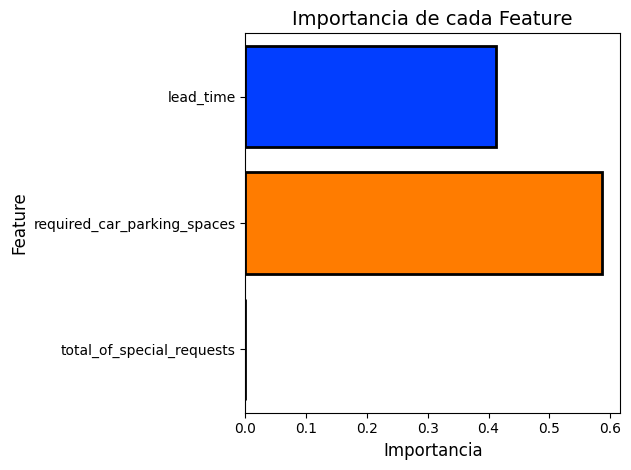

In [46]:
importances_tree = tree.feature_importances_
columns = list(X.columns)

sns.barplot(x=importances_tree, y=columns, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)
plt.title('Importancia de cada Feature', fontsize=14)
plt.xlabel('Importancia', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

###### Con Random Forest

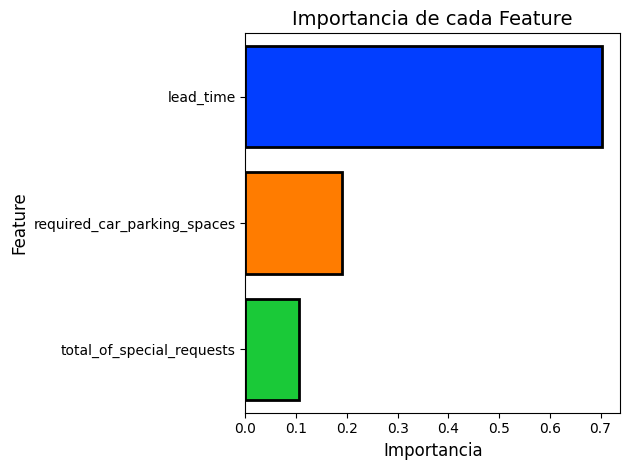

In [47]:
importances_random_forest = random_forest.feature_importances_
columns = list(X.columns)

sns.barplot(x=importances_random_forest, y=columns, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)
plt.title('Importancia de cada Feature', fontsize=14)
plt.xlabel('Importancia', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

###### Con Regresión Logística

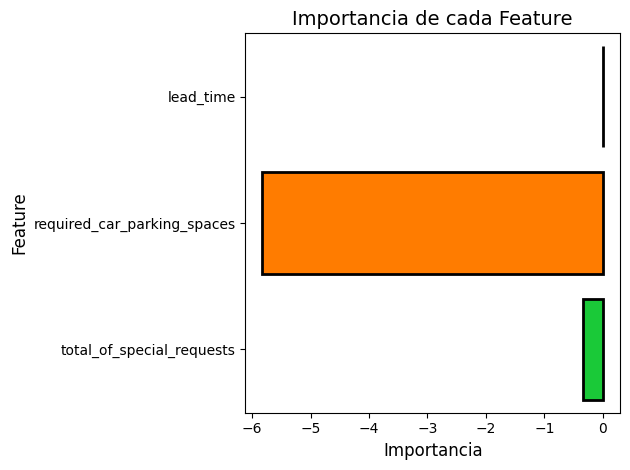

In [48]:
importances_regression_logistic = regression_logistic.coef_[0]  # Extrae los coeficientes de la regresión logística
columns = list(X.columns)  # Obtén los nombres de las columnas


sns.barplot(x=importances_regression_logistic, y=columns, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)
plt.title('Importancia de cada Feature', fontsize=14)
plt.xlabel('Importancia', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

### Resumen

In [49]:
# Crear una consola Rich
console = Console()

# Inicializar tabla para los resultados
result_table = Table(title="Resultados de Modelos", show_lines=True)
result_table.add_column("Modelo", justify="left", style="bright_cyan")
result_table.add_column("Precisión", justify="center", style="bright_green")
result_table.add_column("Reporte de Clasificación", justify="left", style="bright_magenta")

# Añadir los resultados a la tabla
result_table.add_row(
    "Árbol de Decisión",
    f"{test_accuracy_tree:.2f}",
    f"[bold bright_magenta]{classification_report(y_test, y_test_pred_tree)}[/bold bright_magenta]"
)


# Añadir los resultados a la tabla
result_table.add_row(
    "Random Forest",
    f"{test_accuracy_random_forest:.2f}",
    f"[bold bright_magenta]{classification_report(y_test, y_test_pred_random_forest)}[/bold bright_magenta]"
)


# Añadir los resultados a la tabla
result_table.add_row(
    "Regresión Logística",
    f"{test_accuracy_regression_logistic:.2f}",
    f"[bold bright_magenta]{classification_report(y_test, y_test_pred_regression_logistic)}[/bold bright_magenta]"
)

# Determinar el modelo con mejor precisión
best_model = max(
    [("Árbol de Decisión", test_accuracy_tree), 
     ("Random Forest", test_accuracy_random_forest), 
     ("Regresión Logística", test_accuracy_regression_logistic)], 
    key=lambda x: x[1]
)

# Imprimir resultados
console.print(result_table)
console.print(f"[bold yellow]El modelo con mayor performance es: {best_model[0]} con una precisión de {best_model[1]:.2f}[/bold yellow]")



c:\Users\ASUS\OneDrive\Documentos\1aaaaEsposo_Jaime\U_Trabajo\perfilPython\mi_entorno\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\OneDrive\Documentos\1aaaaEsposo_Jaime\U_Trabajo\perfilPython\mi_entorno\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\OneDrive\Documentos\1aaaaEsposo_Jaime\U_Trabajo\perfilPython\mi_entorno\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no pr

                                   Resultados de Modelos                                   
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Modelo              ┃ Precisión ┃ Reporte de Clasificación                              ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Árbol de Decisión   │   0.73    │               precision    recall  f1-score   support │
│                     │           │                                                       │
│                     │           │            0       0.73      1.00      0.84     19049 │
│                     │           │            1       0.00      0.00      0.00      7162 │
│                     │           │                                                       │
│                     │           │     accuracy                           0.73     26211 │
│                     │           │    macro avg       0.36      0.50      0.42     26211 │
│                     │           │ weighted avg       0.53      0.73      0.61     26211 │
│                     │           │                                                       │
├─────────────────────┼───────────┼───────────────────────────────────────────────────────┤
│ Random Forest       │   0.69    │               precision    recall  f1-score   support │
│                     │           │                                                       │
│                     │           │            0       0.75      0.86      0.80     19049 │
│                     │           │            1       0.38      0.23      0.29      7162 │
│                     │           │                                                       │
│                     │           │     accuracy                           0.69     26211 │
│                     │           │    macro avg       0.56      0.54      0.54     26211 │
│                     │           │ weighted avg       0.65      0.69      0.66     26211 │
│                     │           │                                                       │
├─────────────────────┼───────────┼───────────────────────────────────────────────────────┤
│ Regresión Logística │   0.73    │               precision    recall  f1-score   support │
│                     │           │                                                       │
│                     │           │            0       0.73      0.98      0.84     19049 │
│                     │           │            1       0.50      0.05      0.09      7162 │
│                     │           │                                                       │
│                     │           │     accuracy                           0.73     26211 │
│                     │           │    macro avg       0.62      0.52      0.46     26211 │
│                     │           │ weighted avg       0.67      0.73      0.63     26211 │
│                     │           │                                                       │
└─────────────────────┴───────────┴───────────────────────────────────────────────────────┘

El modelo con mayor performance es: Regresión Logística con una precisión de 0.73

# Respuestas a preguntas

##### 1. ¿Este es un problema de regresión o clasificación?

Este es un problema de clasificación. La tarea es predecir si una reserva será cancelada o no, lo cual es una variable categórica (is_canceled).

##### 2. Hacer tabla de correlación para las variables

In [22]:
# Seleccionar las columnas numéricas
columnas_numericas = df.select_dtypes(include=['number']).columns

# Imprimir los nombres de las columnas numéricas
print(columnas_numericas)

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')


In [23]:
# Calcular la matriz de correlaciones
matriz_correlaciones = df[columnas_numericas].corr()

# Crear la consola de Rich
console = Console()

# Crear la tabla con título
table = Table(title="Matriz de Correlaciones")

# Añadir la primera columna (nombres de las columnas numéricas)
table.add_column("Columnas", justify="left", style="cyan", no_wrap=True)

# Añadir las columnas de correlaciones
for column in matriz_correlaciones.columns:
    table.add_column(column, justify="center", style="magenta")

# Añadir las filas con los valores de correlación
for idx, row in matriz_correlaciones.iterrows():
    table.add_row(
        idx,  # Nombre de la fila
        *[f"{value:.2f}" for value in row]  # Valores formateados
    )

# Imprimir la tabla
console.print(table)

                                              Matriz de Correlaciones                                              
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━┳━━━━┳━━━┳━━━━┳━━━┳━━━━┳━━━┳━━━━┳━━━┳━━━━┳━━━┳━━━━┳━━━┳━━━━┳━━━┳━━━━┳━━━┳━━━━┓
┃ Columnas                       ┃ … ┃ l… ┃ … ┃ a… ┃ … ┃ s… ┃ … ┃ a… ┃ … ┃ b… ┃ … ┃ p… ┃ … ┃ b… ┃ … ┃ a… ┃ … ┃ t… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━╇━━━━╇━━━╇━━━━╇━━━╇━━━━╇━━━╇━━━━╇━━━╇━━━━╇━━━╇━━━━╇━━━╇━━━━╇━━━╇━━━━╇━━━╇━━━━┩
│ is_canceled                    │ … │ 0… │ … │ 0… │ … │ 0… │ … │ 0… │ … │ -… │ … │ 0… │ … │ -… │ … │ 0… │ … │ -… │
│ lead_time                      │ … │ 1… │ … │ 0… │ … │ 0… │ … │ 0… │ … │ -… │ … │ 0… │ … │ 0… │ … │ 0… │ … │ 0… │
│ arrival_date_year              │ … │ 0… │ … │ -… │ … │ 0… │ … │ 0… │ … │ -… │ … │ -… │ … │ 0… │ … │ 0… │ … │ 0… │
│ arrival_date_week_number       │ … │ 0… │ … │ 1… │ … │ 0… │ … │ 0… │ … │ 0… │ … │ 0… │ … │ 0… │ … │ 0… │ … │ 0… │
│ arrival_date_day_of_month      │ … │ 0… │ … │ 0… │ … │ -… │ … │ -… │ … │ -… │ … │ -… │ … │ 0… │ … │ 0… │ … │ -… │
│ stays_in_weekend_nights        │ … │ 0… │ … │ 0… │ … │ 1… │ … │ 0… │ … │ 0… │ … │ -… │ … │ 0… │ … │ 0… │ … │ 0… │
│ stays_in_week_nights           │ … │ 0… │ … │ 0… │ … │ 0… │ … │ 0… │ … │ 0… │ … │ -… │ … │ 0… │ … │ 0… │ … │ 0… │
│ adults                         │ … │ 0… │ … │ 0… │ … │ 0… │ … │ 1… │ … │ 0… │ … │ -… │ … │ -… │ … │ 0… │ … │ 0… │
│ children                       │ … │ 0… │ … │ 0… │ … │ 0… │ … │ 0… │ … │ 0… │ … │ -… │ … │ 0… │ … │ 0… │ … │ 0… │
│ babies                         │ … │ -… │ … │ 0… │ … │ 0… │ … │ 0… │ … │ 1… │ … │ -… │ … │ 0… │ … │ 0… │ … │ 0… │
│ is_repeated_guest              │ … │ -… │ … │ -… │ … │ -… │ … │ -… │ … │ -… │ … │ 0… │ … │ 0… │ … │ -… │ … │ -… │
│ previous_cancellations         │ … │ 0… │ … │ 0… │ … │ -… │ … │ -… │ … │ -… │ … │ 1… │ … │ -… │ … │ -… │ … │ 0… │
│ previous_bookings_not_canceled │ … │ -… │ … │ -… │ … │ -… │ … │ -… │ … │ -… │ … │ 0… │ … │ 0… │ … │ -… │ … │ 0… │
│ booking_changes                │ … │ 0… │ … │ 0… │ … │ 0… │ … │ -… │ … │ 0… │ … │ -… │ … │ 1… │ … │ 0… │ … │ 0… │
│ days_in_waiting_list           │ … │ 0… │ … │ 0… │ … │ -… │ … │ -… │ … │ -… │ … │ 0… │ … │ 0… │ … │ -… │ … │ -… │
│ adr                            │ … │ 0… │ … │ 0… │ … │ 0… │ … │ 0… │ … │ 0… │ … │ -… │ … │ 0… │ … │ 1… │ … │ 0… │
│ required_car_parking_spaces    │ … │ -… │ … │ 0… │ … │ -… │ … │ 0… │ … │ 0… │ … │ -… │ … │ 0… │ … │ 0… │ … │ 0… │
│ total_of_special_requests      │ … │ 0… │ … │ 0… │ … │ 0… │ … │ 0… │ … │ 0… │ … │ 0… │ … │ 0… │ … │ 0… │ … │ 1… │
└────────────────────────────────┴───┴────┴───┴────┴───┴────┴───┴────┴───┴────┴───┴────┴───┴────┴───┴────┴───┴────┘

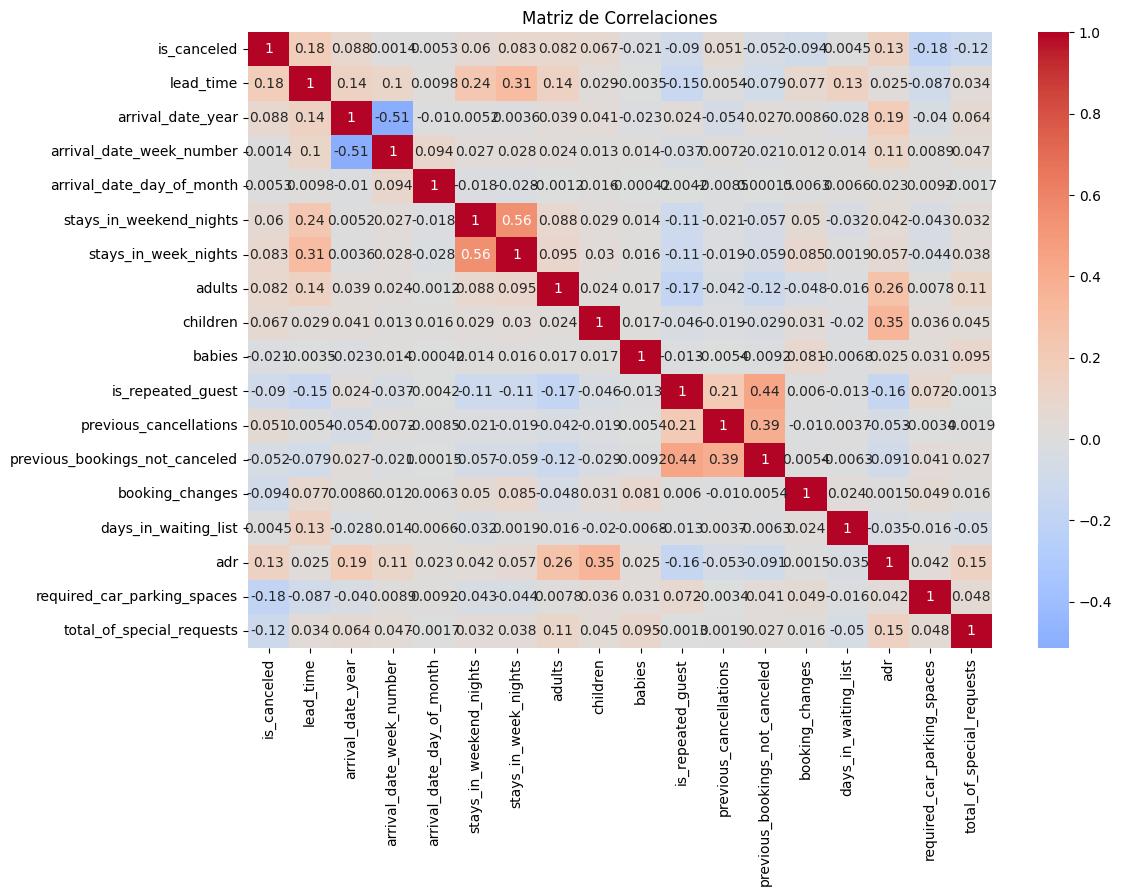

In [24]:
# Crear un mapa de calor de la matriz de correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlaciones, annot=True, cmap='coolwarm', center=0)

# Añadir título
plt.title('Matriz de Correlaciones')

# Mostrar el mapa de calor
plt.show()

##### 3. Encontrar las mejores variables para predecir cancelaciones

In [26]:
# Crear la consola Rich
console = Console()

# Seleccionar las mejores variables
X = df[columnas_numericas]
y = df['is_canceled']

# Aplicar SelectKBest
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

# Obtener los nombres de las variables seleccionadas
mask = selector.get_support()  # lista de booleanos
new_features = [feature for bool, feature in zip(mask, columnas_numericas) if bool]

# Crear una tabla con Rich para mostrar las variables seleccionadas
table = Table(title="Mejores Variables para Predecir Cancelaciones", title_justify="center", border_style="bright_cyan")

# Agregar columnas
table.add_column("Índice", justify="center", style="bright_white", header_style="bold bright_white")
table.add_column("Variable", justify="center", style="bright_green", header_style="bold bright_green")

# Llenar la tabla con las mejores variables
for idx, feature in enumerate(new_features, start=1):
    table.add_row(str(idx), feature)

# Imprimir la tabla en consola
console.print(table)

c:\Users\ASUS\OneDrive\Documentos\1aaaaEsposo_Jaime\U_Trabajo\perfilPython\mi_entorno\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


    Mejores Variables para Predecir     
             Cancelaciones              
┏━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Índice ┃          Variable           ┃
┡━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│   1    │         is_canceled         │
│   2    │          lead_time          │
│   3    │      arrival_date_year      │
│   4    │    stays_in_week_nights     │
│   5    │           adults            │
│   6    │      is_repeated_guest      │
│   7    │       booking_changes       │
│   8    │             adr             │
│   9    │ required_car_parking_spaces │
│   10   │  total_of_special_requests  │
└────────┴─────────────────────────────┘

##### 4. ¿Cuál es el modelo con mayor performance?

In [27]:
# Crear una consola Rich
console = Console()

# Inicializar tabla para los resultados
result_table = Table(title="Resultados de Modelos", show_lines=True)
result_table.add_column("Modelo", justify="left", style="bright_cyan")
result_table.add_column("Precisión", justify="center", style="bright_green")
result_table.add_column("Reporte de Clasificación", justify="left", style="bright_magenta")

# Añadir los resultados a la tabla
result_table.add_row(
    "Árbol de Decisión",
    f"{test_accuracy_tree:.2f}",
    f"[bold bright_magenta]{classification_report(y_test, y_test_pred_tree)}[/bold bright_magenta]"
)


# Añadir los resultados a la tabla
result_table.add_row(
    "Random Forest",
    f"{test_accuracy_random_forest:.2f}",
    f"[bold bright_magenta]{classification_report(y_test, y_test_pred_random_forest)}[/bold bright_magenta]"
)


# Añadir los resultados a la tabla
result_table.add_row(
    "Regresión Logística",
    f"{test_accuracy_regression_logistic:.2f}",
    f"[bold bright_magenta]{classification_report(y_test, y_test_pred_regression_logistic)}[/bold bright_magenta]"
)

# Determinar el modelo con mejor precisión
best_model = max(
    [("Árbol de Decisión", test_accuracy_tree), 
     ("Random Forest", test_accuracy_random_forest), 
     ("Regresión Logística", test_accuracy_regression_logistic)], 
    key=lambda x: x[1]
)

# Imprimir resultados
console.print(result_table)
console.print(f"[bold yellow]El modelo con mayor performance es: {best_model[0]} con una precisión de {best_model[1]:.2f}[/bold yellow]")


c:\Users\ASUS\OneDrive\Documentos\1aaaaEsposo_Jaime\U_Trabajo\perfilPython\mi_entorno\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\OneDrive\Documentos\1aaaaEsposo_Jaime\U_Trabajo\perfilPython\mi_entorno\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\OneDrive\Documentos\1aaaaEsposo_Jaime\U_Trabajo\perfilPython\mi_entorno\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no pr

                                   Resultados de Modelos                                   
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Modelo              ┃ Precisión ┃ Reporte de Clasificación                              ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Árbol de Decisión   │   0.73    │               precision    recall  f1-score   support │
│                     │           │                                                       │
│                     │           │            0       0.73      1.00      0.84     19049 │
│                     │           │            1       0.00      0.00      0.00      7162 │
│                     │           │                                                       │
│                     │           │     accuracy                           0.73     26211 │
│                     │           │    macro avg       0.36      0.50      0.42     26211 │
│                     │           │ weighted avg       0.53      0.73      0.61     26211 │
│                     │           │                                                       │
├─────────────────────┼───────────┼───────────────────────────────────────────────────────┤
│ Random Forest       │   0.69    │               precision    recall  f1-score   support │
│                     │           │                                                       │
│                     │           │            0       0.75      0.86      0.80     19049 │
│                     │           │            1       0.38      0.23      0.29      7162 │
│                     │           │                                                       │
│                     │           │     accuracy                           0.69     26211 │
│                     │           │    macro avg       0.56      0.54      0.54     26211 │
│                     │           │ weighted avg       0.65      0.69      0.66     26211 │
│                     │           │                                                       │
├─────────────────────┼───────────┼───────────────────────────────────────────────────────┤
│ Regresión Logística │   0.73    │               precision    recall  f1-score   support │
│                     │           │                                                       │
│                     │           │            0       0.73      0.98      0.84     19049 │
│                     │           │            1       0.50      0.05      0.09      7162 │
│                     │           │                                                       │
│                     │           │     accuracy                           0.73     26211 │
│                     │           │    macro avg       0.62      0.52      0.46     26211 │
│                     │           │ weighted avg       0.67      0.73      0.63     26211 │
│                     │           │                                                       │
└─────────────────────┴───────────┴───────────────────────────────────────────────────────┘

El modelo con mayor performance es: Regresión Logística con una precisión de 0.73

##### 5. ¿Cuáles son las variables más importantes para predecir cancelaciones?

###### Con arbol de decisión

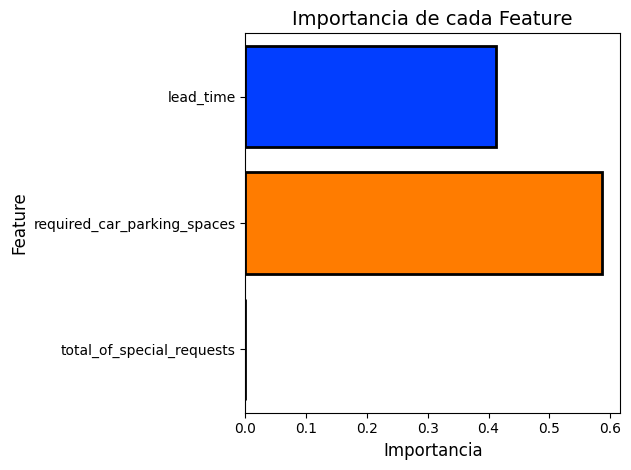

In [51]:
importances_tree = tree.feature_importances_
columns = list(X.columns)

sns.barplot(x=importances_tree, y=columns, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)
plt.title('Importancia de cada Feature', fontsize=14)
plt.xlabel('Importancia', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

###### Con Random Forest

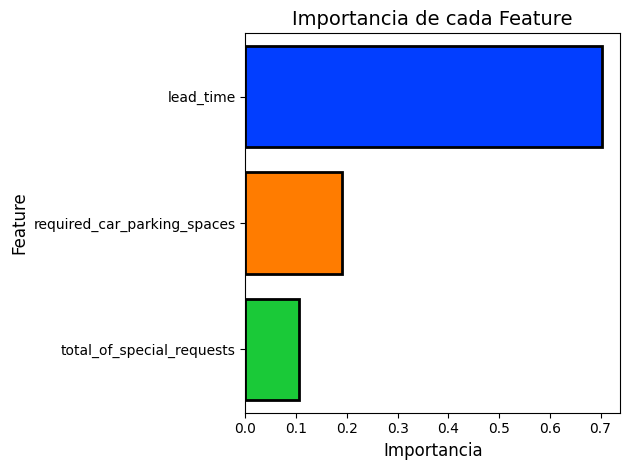

In [52]:
importances_random_forest = random_forest.feature_importances_
columns = list(X.columns)

sns.barplot(x=importances_random_forest, y=columns, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)
plt.title('Importancia de cada Feature', fontsize=14)
plt.xlabel('Importancia', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

###### Con Regresión Logística

In [ ]:
importances_regression_logistic = regression_logistic.coef_[0]  # Extrae los coeficientes de la regresión logística
columns = list(X.columns)  # Obtén los nombres de las columnas


sns.barplot(x=importances_regression_logistic, y=columns, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)
plt.title('Importancia de cada Feature', fontsize=14)
plt.xlabel('Importancia', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

##### 6. Evaluar el comportamiento de las tres variables más importantes con respecto a la cancelación

###### Árbol de Decisión

In [53]:
# Obtener la importancia de las características
importances_evalue_tree = tree.feature_importances_
indices = np.argsort(importances_evalue_tree)[::-1]

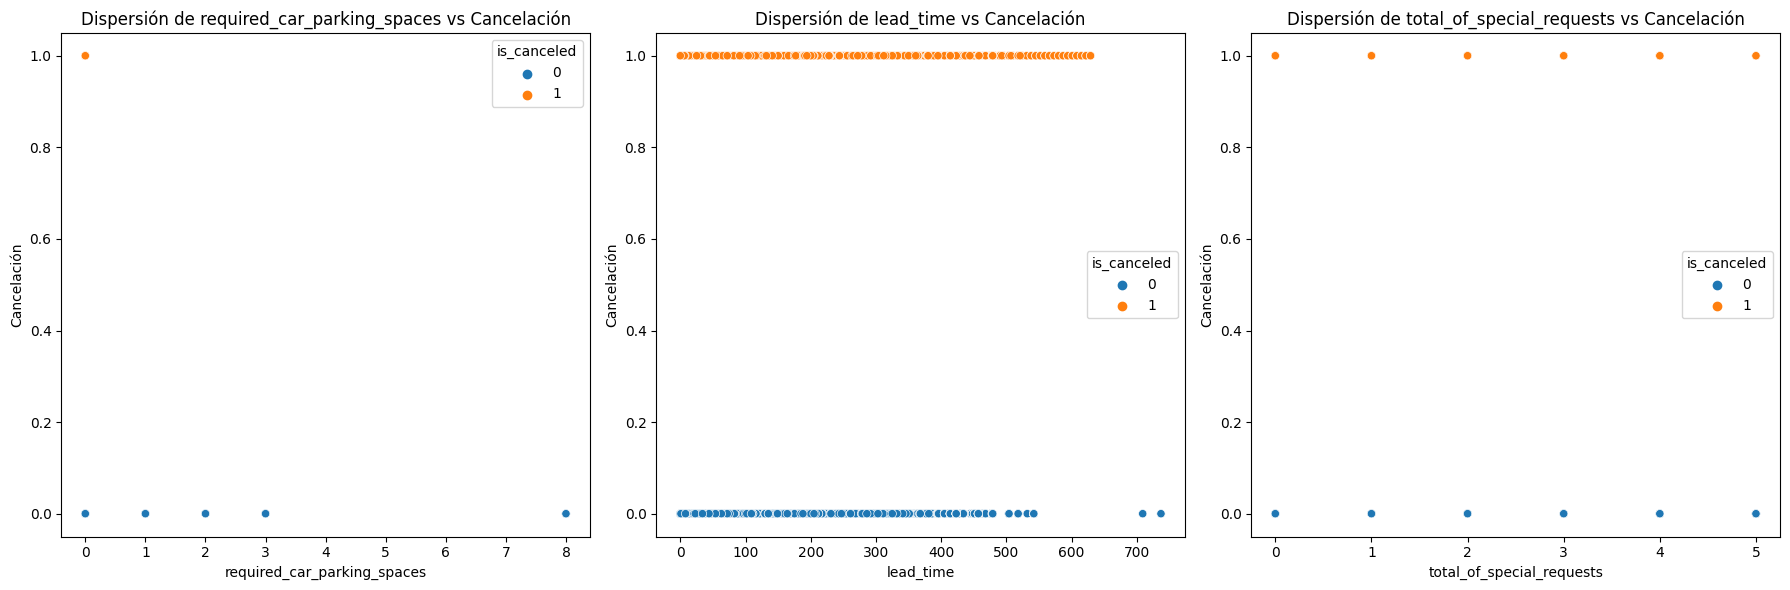

In [54]:
# Seleccionar las tres variables más importantes
top_3_features = X.columns[indices[:3]]

# Crear gráficos de dispersión para las tres variables más importantes
plt.figure(figsize=(18, 6))
for i, feature in enumerate(top_3_features, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=df[feature], y=df['is_canceled'], hue=df['is_canceled'])
    plt.title(f'Dispersión de {feature} vs Cancelación')
    plt.xlabel(feature)
    plt.ylabel('Cancelación')
plt.tight_layout()
plt.show()

###### Random Forest

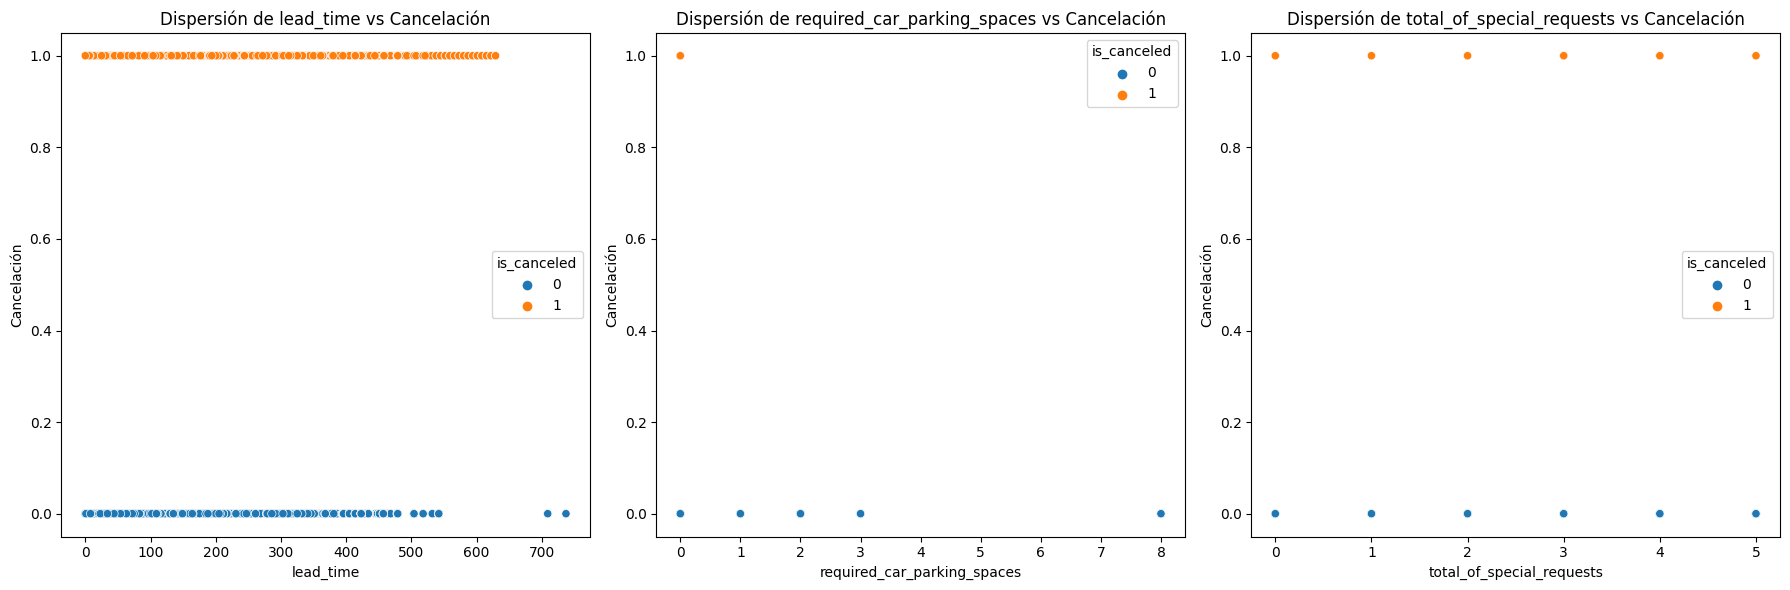

In [55]:
# Obtener la importancia de las características
importances_evalue_random_forest = random_forest.feature_importances_
indices = np.argsort(importances_evalue_random_forest)[::-1]

# Seleccionar las tres variables más importantes
top_3_features = X.columns[indices[:3]]

# Crear gráficos de dispersión para las tres variables más importantes
plt.figure(figsize=(18, 6))
for i, feature in enumerate(top_3_features, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=df[feature], y=df['is_canceled'], hue=df['is_canceled'])
    plt.title(f'Dispersión de {feature} vs Cancelación')
    plt.xlabel(feature)
    plt.ylabel('Cancelación')
plt.tight_layout()
plt.show()

###### Regresión Logística

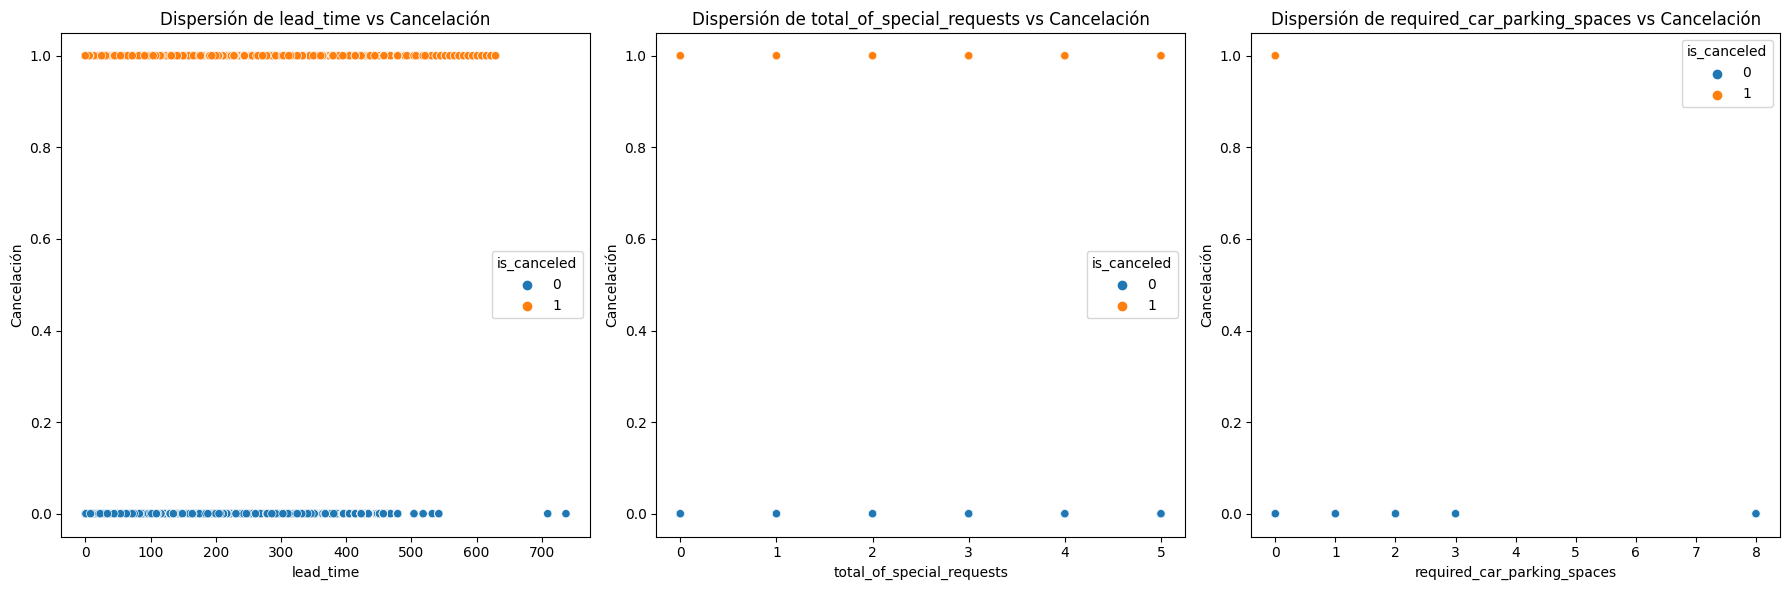

In [57]:
# Obtener la importancia de las características
importances_evalue_regression_logistic = regression_logistic.coef_[0]
indices = np.argsort(importances_evalue_regression_logistic)[::-1]

# Seleccionar las tres variables más importantes
top_3_features = X.columns[indices[:3]]

# Crear gráficos de dispersión para las tres variables más importantes
plt.figure(figsize=(18, 6))
for i, feature in enumerate(top_3_features, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=df[feature], y=df['is_canceled'], hue=df['is_canceled'])
    plt.title(f'Dispersión de {feature} vs Cancelación')
    plt.xlabel(feature)
    plt.ylabel('Cancelación')
plt.tight_layout()
plt.show()